In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import os

In [2]:
import json

In [4]:
data = list()
with open('Sarcasm_Headlines_Dataset_v2.json','r') as f:
    for line in f:
        data.append(json.loads(line))

In [5]:
labels = []
headline = []
for i in data:
    labels.append(i["is_sarcastic"])
    headline.append(i["headline"])

In [6]:
labels[100],headline[100]

(1,
 'report: 70% of trump endorsements made after staring at bedroom ceiling for 4 hours')

In [7]:
print(len(labels),len(headline))
assert len(labels) == len(headline)

28619 28619


In [9]:
labels = labels[:10000]
headline = headline[:10000]

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer,text_to_word_sequence

/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mac/anaconda3/envs/Educate/lib/python3.7/s

In [11]:
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
test_portion=.3
training_size= int(len(labels) * (1 - test_portion))

In [12]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(headline)

In [13]:
len(tokenizer.word_index)

18046

In [14]:
word_index = tokenizer.word_index
vocab_size = len(word_index)

In [15]:
headline_length = []
for i in headline:
    headline_length.append(len(i))
np.mean(headline_length),np.median(headline_length)

(62.3589, 62.0)

In [16]:
import scipy.stats
print(scipy.stats.describe(headline_length))
print(scipy.stats.describe(headline_length).minmax[1])

DescribeResult(nobs=10000, minmax=(9, 926), mean=62.3589, variance=475.17520831083107, skewness=6.513176228572352, kurtosis=246.47889326239886)
926


In [17]:
max_length = 300
sequences = tokenizer.texts_to_sequences(headline)
padded = pad_sequences(sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)


In [18]:
X_train,X_test,y_train,y_test = train_test_split(padded,labels)
X_train.shape,X_test.shape

((7500, 300), (2500, 300))

In [19]:
test_sequences = padded[training_size:]
training_sequences = padded[:training_size]
test_labels = labels[training_size:]
training_labels = labels[:training_size]

In [29]:
import tensorflow as tf

In [27]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 64)           1155008   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,188,289
Trainable params: 1,188,289
Non-trainable params: 0
_________________________________________________________________


In [28]:
num_epochs = 5
# history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1,callbacks=[lr_schedule])

history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)

print("Training Complete")

Train on 7500 samples, validate on 2500 samples


InvalidArgumentError: No OpKernel was registered to support Op 'CudnnRNN' used by node bidirectional/CudnnRNN (defined at <ipython-input-24-f7138bb700b5>:8) with these attrs: [seed=0, dropout=0, input_mode="linear_input", T=DT_FLOAT, direction="unidirectional", rnn_mode="lstm", seed2=0, is_training=true]
Registered devices: [CPU]
Registered kernels:
  <no registered kernels>

	 [[node bidirectional/CudnnRNN (defined at <ipython-input-24-f7138bb700b5>:8) ]]

Caused by op 'bidirectional/CudnnRNN', defined at:
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/asyncio/base_events.py", line 1771, in _run_once
    handle._run()
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-f7138bb700b5>", line 8, in <module>
    tf.keras.layers.Dense(1, activation='sigmoid')
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/training/checkpointable/base.py", line 442, in _method_wrapper
    method(self, *args, **kwargs)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py", line 109, in __init__
    self.add(layer)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/training/checkpointable/base.py", line 442, in _method_wrapper
    method(self, *args, **kwargs)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py", line 180, in add
    output_tensor = layer(self.outputs[0])
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/keras/layers/wrappers.py", line 471, in __call__
    return super(Bidirectional, self).__call__(inputs, **kwargs)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py", line 554, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/keras/layers/wrappers.py", line 571, in call
    y = self.forward_layer.call(inputs, **kwargs)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/keras/layers/cudnn_recurrent.py", line 111, in call
    output, states = self._process_batch(inputs, initial_state)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/keras/layers/cudnn_recurrent.py", line 501, in _process_batch
    is_training=True)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/ops/gen_cudnn_rnn_ops.py", line 142, in cudnn_rnn
    seed2=seed2, is_training=is_training, name=name)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/Users/mac/anaconda3/envs/Educate/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'CudnnRNN' used by node bidirectional/CudnnRNN (defined at <ipython-input-24-f7138bb700b5>:8) with these attrs: [seed=0, dropout=0, input_mode="linear_input", T=DT_FLOAT, direction="unidirectional", rnn_mode="lstm", seed2=0, is_training=true]
Registered devices: [CPU]
Registered kernels:
  <no registered kernels>

	 [[node bidirectional/CudnnRNN (defined at <ipython-input-24-f7138bb700b5>:8) ]]


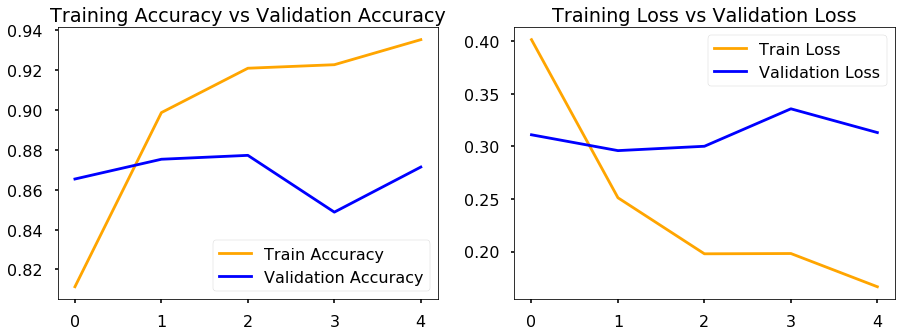

In [24]:
import matplotlib.style as style
style.use('seaborn-poster')
#########################################################
f,(acc,loss) = plt.subplots(1,2,figsize=(15,5))
acc.plot(model.history.history['acc'],color = 'orange')
acc.plot(model.history.history['val_acc'],color = 'blue')
acc.set_title('Training Accuracy vs Validation Accuracy')
acc.legend(['Train Accuracy','Validation Accuracy'])
#########################################################
loss.plot(model.history.history['loss'],color = 'orange')
loss.plot(model.history.history['val_loss'],color = 'blue')
loss.set_title('Training Loss vs Validation Loss')
loss.legend(['Train Loss','Validation Loss'])
plt.show()
#########################################################

In [25]:
history.model.evaluate(X_test,y_test)

7155/7155 [==============================] - 4s 491us/sample - loss: 0.3132 - acc: 0.8714


[0.3132286560402143, 0.8714186]

In [26]:
pred = history.model.predict(X_test)

In [27]:
results = 0
cumulative = 0

for prediction,actual in zip(pred,y_test):
    if np.round(prediction) == actual:
        results += 1
    for i in np.round(prediction):
        if i == 1:
            cumulative += 1

In [28]:
print('Predictions with Accuracy: {:.2f}%'.format(results/len(y_test)),'\tActual')
print("-"*62)
print('Sarcastic Predictions:\t   {:.2f}%  ,'.format(cumulative/len(y_test)),'Sarcastic:\t\t{:.2f}%'.format(sum(y_test)/len(y_test)))
print("-"*62)
print('Non-Sarcastic Predictions: {:.2f}%  ,'.format(1- (cumulative/len(y_test))),'Non-Sarcastic:\t{:.2f}%'.format(1- (sum(y_test)/len(y_test))))
print("-"*62)

Predictions with Accuracy: 0.87% 	Actual
--------------------------------------------------------------
Sarcastic Predictions:	   0.45%  , Sarcastic:		0.48%
--------------------------------------------------------------
Non-Sarcastic Predictions: 0.55%  , Non-Sarcastic:	0.52%
--------------------------------------------------------------
